# __State Efficient Ansatz__

## Method explication


In many cases when we try to find the optimal solution of an optimization problem the optimizator could lead to a shallow space where the gradient descent vanishes, known as Barren Plateau (BP). Causes of BP are plenty studied in the literature, the most knwon sources are:   __ansatz__, __initial parameters__, __cost function__, __deep of circuit__, __hardware noise__, between others. In this notebook we will tackle the problem induced by the choice of a "bad" ansatz.

In general the chosen ansatz is a universal Parametrized Quantum Circuit (PQC) since it has a great expresibility, but in contrast has a poor trainability since the search space is the complete Hilbert space of the ansatz system. Xiu Liu et al. propose a new kind of ansatz call __State Efficient Ansatz__ (SEA) that removes some redundancy between the universal unitary and universal pure quantum states [1].

The next esqueme compares the case of a universal ansatz state and the state efficient ansatz.

<center><img src="Conceptualization.jpg" alt="Conceptualization" style="width:500px;"/><center>

 SEA can represent pure and low bipartite entangled quantum states with fewer parameters [1]. That make SEA an efficient way to solve state-oriented tasks 

## Code explication

In [2]:
import sys
sys.path.append('../..')

import numpy as np
import matplotlib.pyplot as plt

from qiskit import transpile
from qiskit_aer import AerSimulator


In [ ]:
from qubap.qiskit.luciano.variational_algorithms import VQE
from qubap.qiskit.luciano.costfunc_barren_plateaus import test_hamiltonian
from qubap.qiskit.felipe.state_efficient_ansatz import ansatz_constructor #SAE

In [ ]:
from qiskit.circuit.library import EfficientSU2

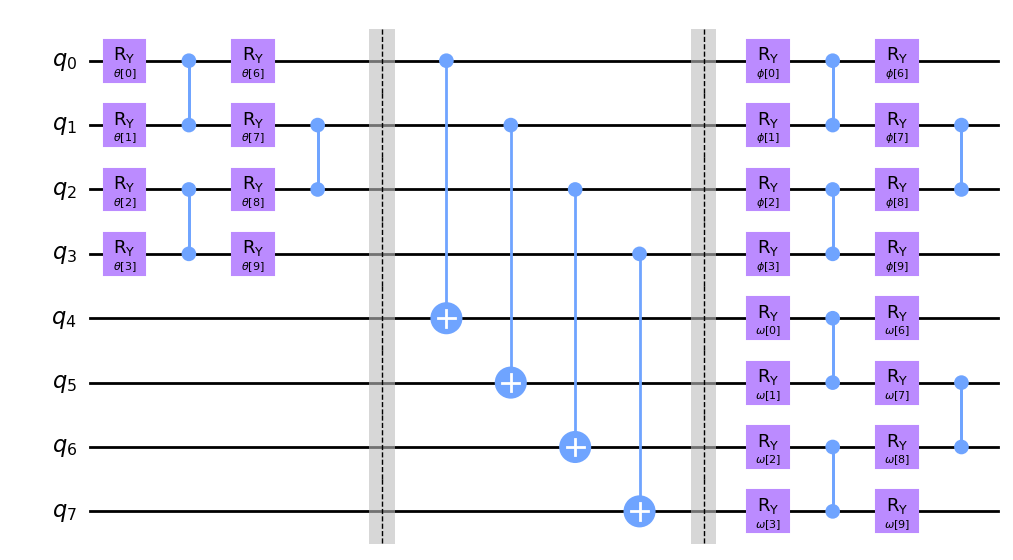

In [5]:
num_qubits = 8
ansatz   = ansatz_constructor( num_qubits )
t_ansatz = transpile(ansatz)

params   = np.random.rand(t_ansatz.num_parameters) * np.pi
ansatz.decompose().draw( 'mpl' )

In [6]:
hamiltoniano = test_hamiltonian( num_qubits, [0,0,1] )

In [7]:
num_iters = 200
simulator_exact = AerSimulator(shots=2**4)
results   = VQE( hamiltoniano, t_ansatz, params, num_iters, simulator_exact, returns='fx' )

TypeError: unhashable type: 'dict'

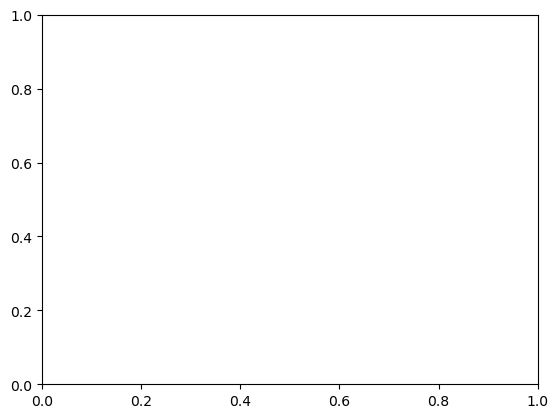

In [8]:
plt.plot(results)
plt.hlines(-1, 0,200, 'r')

In [ ]:
rep       = 2
ansatz_SU = EfficientSU2( num_qubits, ['ry','rz'], 'circular', rep ).decompose()
ansatz_SU.draw('mpl') 

In [ ]:
params_SU  = np.random.rand(ansatz_SU.num_parameters) * np.pi

results_SU = VQE( hamiltoniano, ansatz_SU, params_SU, num_iters, simulator_exact, returns='fx' )

In [ ]:
plt.plot(results_SU)
plt.plot(results)
plt.hlines(-1, 0,200, 'r')